In [316]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt

In [317]:
df = pd.read_csv(r"C:\Users\User\Downloads\owid-covid-data.csv")


In [10]:
# Visualizza le prime righe del dataset
df.head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [11]:
# Dimensioni del dataset
df.shape[0]


388922

In [12]:
df.shape[1]

67

In [13]:
# Informazioni sulle colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388922 entries, 0 to 388921
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388922 non-null  object 
 1   continent                                   370331 non-null  object 
 2   location                                    388922 non-null  object 
 3   date                                        388922 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

In [138]:
# Statistiche descrittive
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.500410e+05,3.779740e+05,3.767440e+05,3.277750e+05,378290.000000,377060.000000,350041.000000,377974.000000,376744.000000,327775.000000,...,223612.000000,147980.000000,266760.000000,358254.000000,292929.000000,3.889220e+05,1.318700e+04,13187.000000,13187.000000,13187.000000
mean,7.416469e+06,8.691576e+03,8.719559e+03,9.013788e+04,77.826382,78.072265,112814.104531,132.070821,132.497956,920.326030,...,32.910555,50.791666,3.097361,73.710996,0.722544,1.290199e+08,5.579910e+04,9.770265,10.979027,1777.206419
std,4.412071e+07,2.391682e+05,9.018375e+04,4.574260e+05,1421.325514,533.206099,160411.084685,1540.907612,570.307845,1132.928263,...,13.573094,31.954302,2.548236,7.395007,0.148996,6.625423e+08,1.559496e+05,12.022926,24.585788,1992.786873
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.501000e+03,0.000000e+00,0.000000e+00,1.370000e+02,0.000000,0.000000,2956.236000,0.000000,0.000000,65.785000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.781000e+02,2.080000,-1.490000,120.205410
50%,8.003600e+04,0.000000e+00,1.742900e+01,1.395000e+03,0.000000,0.143000,32595.574000,0.000000,4.240000,417.464000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.694300e+03,8.150000,5.660000,1248.656900
75%,8.609760e+05,0.000000e+00,4.005710e+02,1.260750e+04,0.000000,4.000000,155877.104000,0.000000,68.012000,1459.484000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.877775e+04,15.050000,15.690000,2878.521250
max,7.751321e+08,4.423623e+07,6.319461e+06,7.042222e+06,103719.000000,14817.000000,770693.756000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,377.830000,10293.515000


In [ ]:
#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
#si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [24]:
# Raggruppa per continente e somma il numero di casi
casi_per_continent= df.groupby('continent')['total_cases'].sum()
casi_per_continent

continent
Africa           1.286876e+10
Asia             2.120759e+11
Europe           2.031561e+11
North America    1.105376e+11
Oceania          9.609695e+09
South America    6.434761e+10
Name: total_cases, dtype: float64

In [130]:
# Filtra le locazioni che hanno informazioni sul continente
df_filtrato = df.dropna(subset=["location"])
df_filtrato

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388917,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388918,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388919,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388920,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [135]:
# Raggruppa per continente e somma il numero di casi
casi_per_continente = df_filtrato.groupby('continent')['total_cases'].sum()
casi_per_continente

continent
Africa           1.286876e+10
Asia             2.120759e+11
Europe           2.031561e+11
North America    1.105376e+11
Oceania          9.609695e+09
South America    6.434761e+10
Name: total_cases, dtype: float64

In [97]:
# Calcola i casi totali nel mondo (considerando anche le locazioni senza continente)
casi_totali_mondo = df["total_cases"].sum()
casi_totali_mondo

2596068215126.0

In [166]:
# Definisci i due continenti di interesse
continent_1="Africa"
continent_1

'Africa'

In [110]:
continent_2="Asia"
continent_2

'Asia'

In [104]:
# Filtra i dati per i due continenti specificati
df_continent_1 = df[df["continent"] == "Africa"]
df_continent_1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
4623,DZA,Africa,Algeria,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4624,DZA,Africa,Algeria,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4625,DZA,Africa,Algeria,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4626,DZA,Africa,Algeria,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
4627,DZA,Africa,Algeria,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,30.4,83.741,1.9,76.88,0.748,44903228.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388917,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388918,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388919,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388920,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [172]:
df_continent_2 = df[df['continent'] == "Asia"]
df_continent_2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385835,YEM,Asia,Yemen,2024-03-20,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN
385836,YEM,Asia,Yemen,2024-03-21,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN
385837,YEM,Asia,Yemen,2024-03-22,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN
385838,YEM,Asia,Yemen,2024-03-23,11945.0,0.0,0.0,2159.0,0.0,0.0,...,29.2,49.542,0.7,66.12,0.470,33696612.0,NaN,NaN,NaN,NaN


In [170]:
# Calcola i descrittori statistici per il primo continente
max_cas_1 = df_continent_1['total_cases'].max()
max_cas_1

4072636.0

In [308]:
mean_cas_1 = df_continent_1['total_cases'].mean().round(2)
mean_cas_1

155741.43

In [307]:
percentuale_cas_1 = ((df_continent_1['total_cases'].sum() / casi_totali_mondo) * 100).round(2)
percentuale_cas_1

0.5

In [174]:
# Calcola i descrittori statistici per il secondo continente
max_cas_2 = df_continent_2['total_cases'].max()
max_cas_2

99345680.0

In [306]:
mean_cas_2 = df_continent_2['total_cases'].mean().round(2)
mean_cas_2

3199745.48

In [305]:
percentuale_cas_2 = ((df_continent_2["total_cases"].sum() / casi_totali_mondo) * 100).round(2)
percentuale_cas_2

8.17

In [318]:
df['YEAR'] = pd.DatetimeIndex(df['date']).year
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,YEAR
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388917,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
388918,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
388919,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024
388920,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024


In [331]:
df['month'] = pd.DatetimeIndex(df['date']).month
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,YEAR,month
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388917,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024,3
388918,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024,3
388919,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024,3
388920,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2024,3


In [303]:
location="Italy"
location

'Italy'

In [329]:
# Filtra i dati relativi all'Italia nel 2022

dati_italia_2022 = df[(df.location == "Italy") & (df.YEAR == 2022)]
dati_italia_2022

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,YEAR
167078,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167079,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,NaN,3.18,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834,2022
167080,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167081,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167082,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167438,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167439,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167440,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022
167441,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN,2022


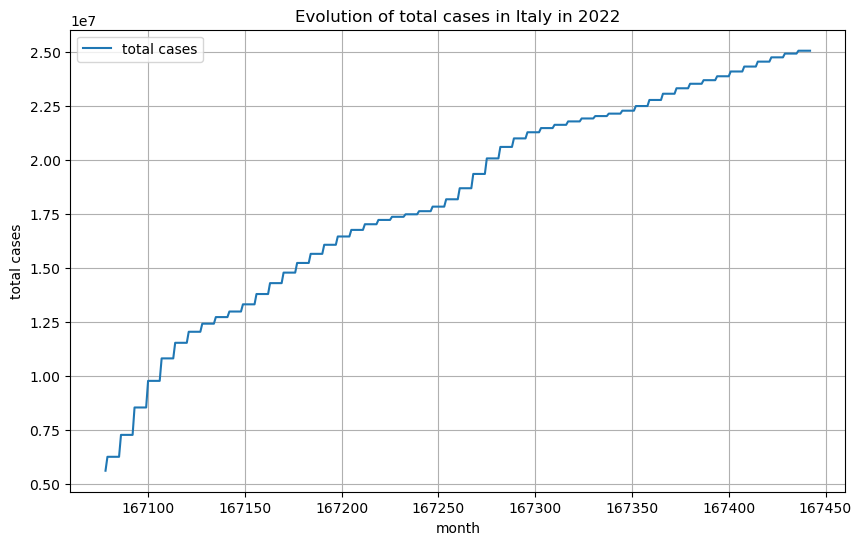

In [332]:
# Grafico dell'evoluzione dei casi totali
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022["total_cases"], label="total cases")
plt.title("Evolution of total cases in Italy in 2022")
plt.xlabel("month")
plt.ylabel("total cases")
plt.legend()
plt.grid(True)
plt.show()

In [333]:
# Calcola i nuovi casi giornalieri
dati_italia_2022["new_cases"] = dati_italia_2022["total_cases"].diff()
dati_italia_2022["new_cases"]

C:\Users\User\AppData\Local\Temp\ipykernel_23060\1066599674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022["new_cases"] = dati_italia_2022["total_cases"].diff()


167078         NaN
167079    644604.0
167080         0.0
167081         0.0
167082         0.0
            ...   
167438         0.0
167439         0.0
167440         0.0
167441         0.0
167442         0.0
Name: new_cases, Length: 365, dtype: float64

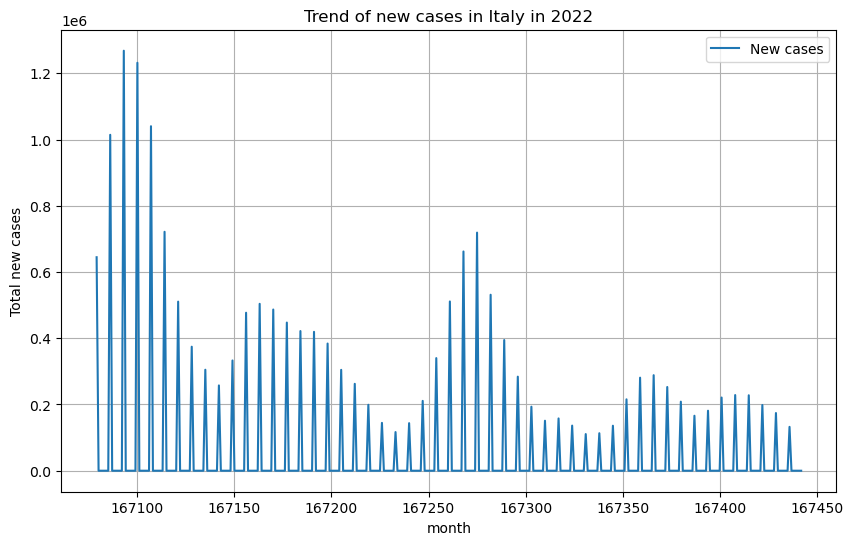

In [334]:
# Grafico dell'andamento dei nuovi casi
plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022["new_cases"], label="New cases")
plt.title("Trend of new cases in Italy in 2022")
plt.xlabel("month")
plt.ylabel("Total new cases")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_23060\916306595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_italia_2022["cumulative_new_cases"] = dati_italia_2022["new_cases"].cumsum()


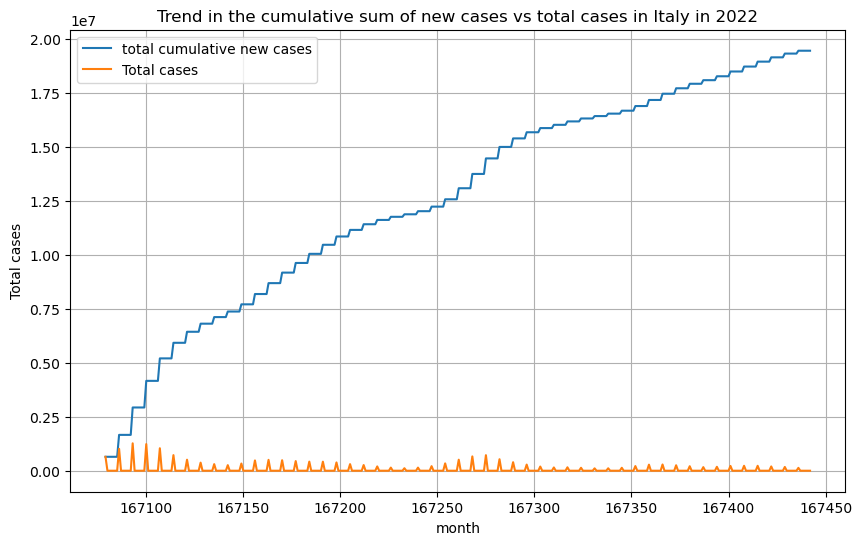

In [335]:
# Grafico della somma cumulativa dei nuovi casi
dati_italia_2022["cumulative_new_cases"] = dati_italia_2022["new_cases"].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(dati_italia_2022["cumulative_new_cases"], label="total cumulative new cases")
plt.plot(dati_italia_2022['new_cases'], label='Total cases')
plt.title("Trend in the cumulative sum of new cases vs total cases in Italy in 2022")
plt.xlabel("month")
plt.ylabel("Total cases")
plt.legend()
plt.grid(True)
plt.show()

In [345]:
# Filtra i dati per le nazioni di Italia, Germania e Francia e per il periodo specificato
dati_selezionati = df[(df["location"].isin(["Italy", "Germany", "France"])) &
                        df[df["date"].isin(pd.date_range("2022-05-1", "2023-04-30"))]]
dati_selezionati

MemoryError: Unable to allocate 1.10 TiB for an array with shape (388922, 388922) and data type object

In [341]:
dati_selezionati = df.loc[df["date"].between("2022-05-1", "2023-04-30")]
dati_selezionati

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,YEAR,month
856,AFG,Asia,Afghanistan,2022-05-10,178923.0,0.0,6.286,7684.0,0.0,0.143,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2022,5
857,AFG,Asia,Afghanistan,2022-05-11,178923.0,0.0,6.286,7684.0,0.0,0.143,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2022,5
858,AFG,Asia,Afghanistan,2022-05-12,178923.0,0.0,6.286,7684.0,0.0,0.143,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2022,5
859,AFG,Asia,Afghanistan,2022-05-13,178923.0,0.0,6.286,7684.0,0.0,0.143,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2022,5
860,AFG,Asia,Afghanistan,2022-05-14,178923.0,0.0,6.286,7684.0,0.0,0.143,...,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2022,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388588,ZWE,Africa,Zimbabwe,2023-04-26,264637.0,0.0,3.857,5685.0,0.0,0.143,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023,4
388589,ZWE,Africa,Zimbabwe,2023-04-27,264637.0,0.0,3.857,5685.0,0.0,0.143,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023,4
388590,ZWE,Africa,Zimbabwe,2023-04-28,264637.0,0.0,3.857,5685.0,0.0,0.143,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023,4
388591,ZWE,Africa,Zimbabwe,2023-04-29,264637.0,0.0,3.857,5685.0,0.0,0.143,...,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN,2023,4


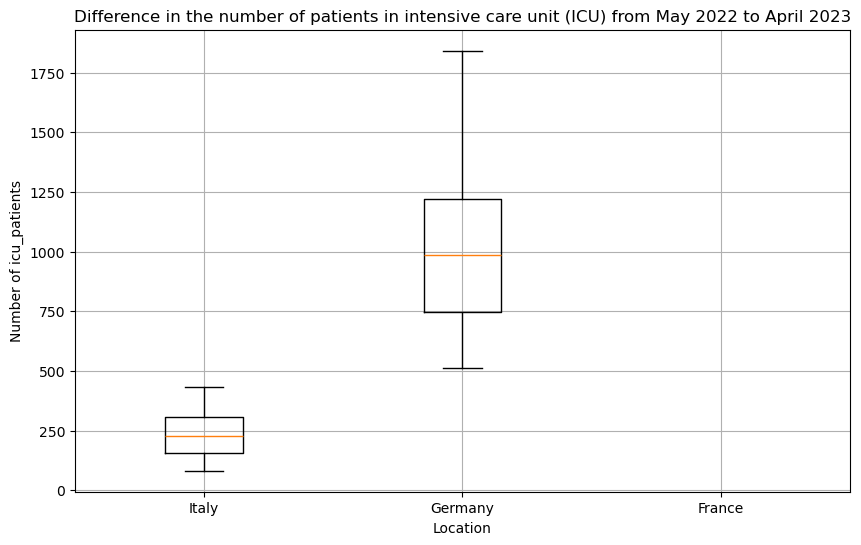

In [346]:
# Crea un boxplot per la differenza nel numero di pazienti in terapia intensiva (ICU)
plt.figure(figsize=(10, 6))
plt.title("Difference in the number of patients in intensive care unit (ICU) from May 2022 to April 2023")
plt.xlabel("Location")
plt.ylabel("Number of icu_patients")
plt.grid(True)
plt.boxplot([dati_selezionati[dati_selezionati["location"] == "Italy"]["icu_patients"],
             dati_selezionati[dati_selezionati["location"] == "Germany"]["icu_patients"],
             dati_selezionati[dati_selezionati["location"] == "France"]["icu_patients"]],
            labels=["Italy", "Germany", "France"])
plt.show()

In [358]:
# Filtra i dati per le nazioni di Italia, Germania, Francia e Spagna e per il 2023
dati_selezionati = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['YEAR'] == 2023)]
dati_selezionati

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,YEAR,month
118124,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,5.98,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708,2023,1
118125,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023,1
118126,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023,1
118127,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023,1
118128,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329228,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023,12
329229,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023,12
329230,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023,12
329231,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN,2023,12


In [359]:
# Verifica se ci sono valori nulli nella colonna 'pazienti_ospedalizzati'
valori_nulli = dati_selezionati['hosp_patients'].isnull().any()
if valori_nulli:
    # Se ci sono valori nulli, suggerisci un'opzione per gestirli
    print("There are null values ​​in the column 'hosp_patients'.")
    print("You can handle null values ​​by replacing them with 0 or with the average of the non-null values.")
    # Sostituisci i valori nulli con 0
    dati_selezionati['hosp_patients'].fillna(0, inplace=True)
print(valori_nulli)

There are null values ​​in the column 'hosp_patients'.
You can handle null values ​​by replacing them with 0 or with the average of the non-null values.
True


C:\Users\User\AppData\Local\Temp\ipykernel_23060\2871125157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_selezionati['hosp_patients'].fillna(0, inplace=True)


In [361]:
# Calcola la somma dei pazienti ospedalizzati per ogni nazione
somma_pazienti_ospedalizzati = dati_selezionati.groupby('location')['hosp_patients'].sum()
somma_pazienti_ospedalizzati

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64